In [2]:
#TV, Radyo ve Gazete ilanlarına göre  ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar 
#sorusuna cevap arayacağız

In [2]:
#pip install pycaret

In [3]:
#Auto-ML ile çözüm

In [8]:
import pandas as pd

In [4]:
from pycaret.regression import*

In [9]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
setup(data=df,target='Sales')

,Description,Value
0,Session id,165
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [8]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4140,0.2882,0.5304,0.9885,0.0418,0.0346,0.1290
gbr,Gradient Boosting Regressor,0.5619,0.5329,0.7220,0.9786,0.0539,0.0448,0.0630
rf,Random Forest Regressor,0.6141,0.6275,0.7718,0.9749,0.0591,0.0503,0.1680
xgboost,Extreme Gradient Boosting,0.6202,0.6181,0.7798,0.9747,0.0583,0.0503,0.0650
lightgbm,Light Gradient Boosting Machine,0.8028,1.1347,1.0496,0.9532,0.0865,0.0696,0.0560
dt,Decision Tree Regressor,0.8636,1.2089,1.0601,0.9524,0.0782,0.0673,0.0190
ada,AdaBoost Regressor,0.9451,1.3183,1.1349,0.9470,0.0899,0.0804,0.0790
knn,K Neighbors Regressor,1.0761,2.2053,1.4597,0.9106,0.0991,0.0818,0.0480
llar,Lasso Least Angle Regression,1.2177,2.5747,1.5980,0.8927,0.1327,0.1092,0.0370
lasso,Lasso Regression,1.2177,2.5747,1.5980,0.8927,0.1327,0.1092,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [4]:
#En iyi sonucu Extra Trees Regressor modeli verdi

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

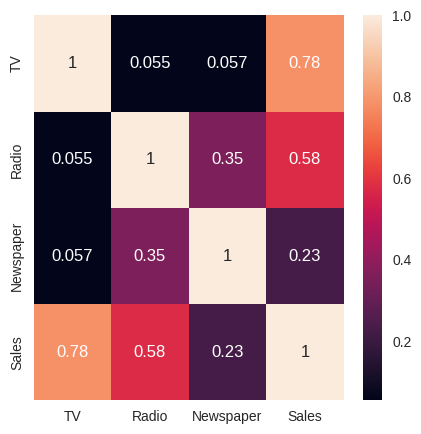

In [13]:
ax=plt.figure(figsize=(5,5));
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [15]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

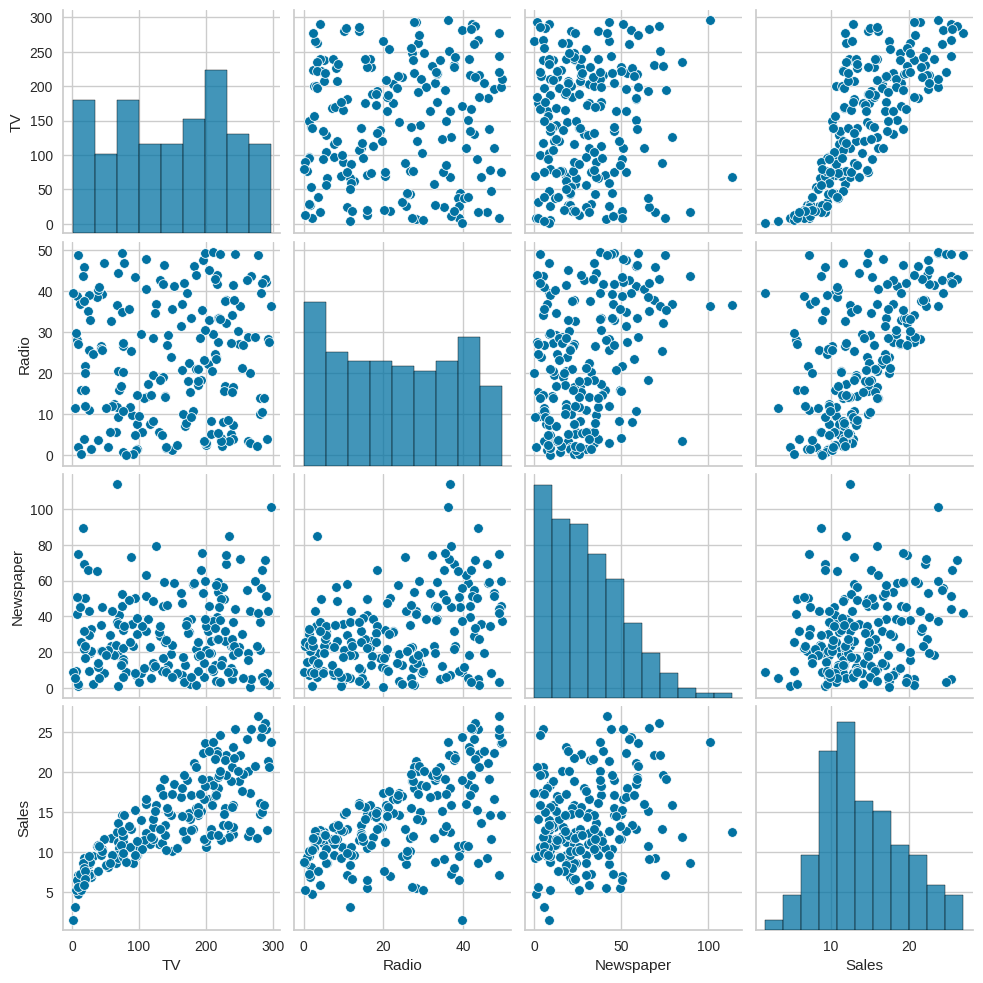

In [17]:
sns.pairplot(data=df);

In [5]:
#Bir de x e tek tek değişkenleri atayıp y ye Sales atayıp ExtraTreeRegressor modelini ayru ayrı ugulayacağız

In [34]:
from sklearn.tree import ExtraTreeRegressor
et=ExtraTreeRegressor()
from sklearn.model_selection import train_test_split

In [35]:
x = df[['TV']]
y = df[['Sales']]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)
model=et.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [38]:
(mean_squared_error(y_test,tahmin))**0.5

2.8093148630938467

In [39]:
r2_score(y_test,tahmin)

0.7499571797016935

In [40]:
x = df[['Radio']]
y = df[['Sales']]

In [41]:
model=et.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [42]:
(mean_squared_error(y_test,tahmin))**0.5

3.0876366366527006

In [43]:
r2_score(y_test,tahmin)

0.6979589816194488

In [44]:
x = df[['Newspaper']]
y = df[['Sales']]

In [45]:
model=et.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [46]:
(mean_squared_error(y_test,tahmin))**0.5

3.7171561710533494

In [47]:
r2_score(y_test,tahmin)

0.5622409124436283

In [1]:
#deep learning ile de dneyeceğiz. (1000 satırdan az veri olduğu için istediğimiz sonuç çıkmayabilir)

In [11]:
x=df.drop('Sales',axis=1)
y=df[['Sales']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
df.shape

(200, 4)

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
2/2 [==============================] - 1s 187ms/step - loss: 304.5994 - val_loss: 242.9976
Epoch 2/300
2/2 [==============================] - 0s 30ms/step - loss: 251.1291 - val_loss: 208.5056
Epoch 3/300
2/2 [==============================] - 0s 29ms/step - loss: 214.4502 - val_loss: 182.1733
Epoch 4/300
2/2 [==============================] - 0s 33ms/step - loss: 186.0108 - val_loss: 158.2740
Epoch 5/300
2/2 [==============================] - 0s 38ms/step - loss: 160.3379 - val_loss: 133.7694
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 134.6935 - val_loss: 108.4912
Epoch 7/300
2/2 [==============================] - 0s 38ms/step - loss: 106.8821 - val_loss: 84.0164
Epoch 8/300
2/2 [==============================] - 0s 34ms/step - loss: 82.2238 - val_loss: 63.2192
Epoch 9/300
2/2 [==============================] - 0s 41ms/step - loss: 60.9570 - val_loss: 45.2909
Epoch 10/300
2/2 [==============================] - 0s 34ms/step - loss: 42.7351 - val

2/2 [==============================] - 0s 28ms/step - loss: 2.0548 - val_loss: 5.1665
Epoch 84/300
2/2 [==============================] - 0s 28ms/step - loss: 2.0444 - val_loss: 5.2565
Epoch 85/300
2/2 [==============================] - 0s 28ms/step - loss: 2.0295 - val_loss: 5.2915
Epoch 86/300
2/2 [==============================] - 0s 31ms/step - loss: 2.0303 - val_loss: 5.1320
Epoch 87/300
2/2 [==============================] - 0s 29ms/step - loss: 2.0219 - val_loss: 4.9847
Epoch 88/300
2/2 [==============================] - 0s 31ms/step - loss: 2.0448 - val_loss: 5.0301
Epoch 89/300
2/2 [==============================] - 0s 28ms/step - loss: 2.0152 - val_loss: 5.2845
Epoch 90/300
2/2 [==============================] - 0s 30ms/step - loss: 2.0076 - val_loss: 5.4036
Epoch 91/300
2/2 [==============================] - 0s 31ms/step - loss: 1.9892 - val_loss: 5.3718
Epoch 92/300
2/2 [==============================] - 0s 28ms/step - loss: 1.9829 - val_loss: 5.4270
Epoch 93/300
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 1.4906 - val_loss: 6.4055
Epoch 166/300
2/2 [==============================] - 0s 32ms/step - loss: 1.4747 - val_loss: 6.4551
Epoch 167/300
2/2 [==============================] - 0s 30ms/step - loss: 1.4667 - val_loss: 6.4536
Epoch 168/300
2/2 [==============================] - 0s 29ms/step - loss: 1.4725 - val_loss: 6.3882
Epoch 169/300
2/2 [==============================] - 0s 29ms/step - loss: 1.4678 - val_loss: 6.3069
Epoch 170/300
2/2 [==============================] - 0s 30ms/step - loss: 1.4557 - val_loss: 6.3190
Epoch 171/300
2/2 [==============================] - 0s 29ms/step - loss: 1.4519 - val_loss: 6.4889
Epoch 172/300
2/2 [==============================] - 0s 32ms/step - loss: 1.4480 - val_loss: 6.6541
Epoch 173/300
2/2 [==============================] - 0s 33ms/step - loss: 1.4925 - val_loss: 6.5860
Epoch 174/300
2/2 [==============================] - 0s 34ms/step - loss: 1.4571 - val_loss: 6.3935
Epoch 175/300


2/2 [==============================] - 0s 31ms/step - loss: 1.0690 - val_loss: 5.1219
Epoch 248/300
2/2 [==============================] - 0s 33ms/step - loss: 1.0921 - val_loss: 5.1281
Epoch 249/300
2/2 [==============================] - 0s 32ms/step - loss: 1.0803 - val_loss: 5.2463
Epoch 250/300
2/2 [==============================] - 0s 31ms/step - loss: 1.0580 - val_loss: 5.3315
Epoch 251/300
2/2 [==============================] - 0s 31ms/step - loss: 1.0696 - val_loss: 5.3369
Epoch 252/300
2/2 [==============================] - 0s 31ms/step - loss: 1.0792 - val_loss: 5.6435
Epoch 253/300
2/2 [==============================] - 0s 38ms/step - loss: 1.0777 - val_loss: 6.0318
Epoch 254/300
2/2 [==============================] - 0s 36ms/step - loss: 1.1313 - val_loss: 5.5939
Epoch 255/300
2/2 [==============================] - 0s 33ms/step - loss: 1.0388 - val_loss: 5.3460
Epoch 256/300
2/2 [==============================] - 0s 32ms/step - loss: 1.1519 - val_loss: 5.3075
Epoch 257/300


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                76        
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1616 (6.31 KB)
Trainable params: 1616 (6.3

In [21]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

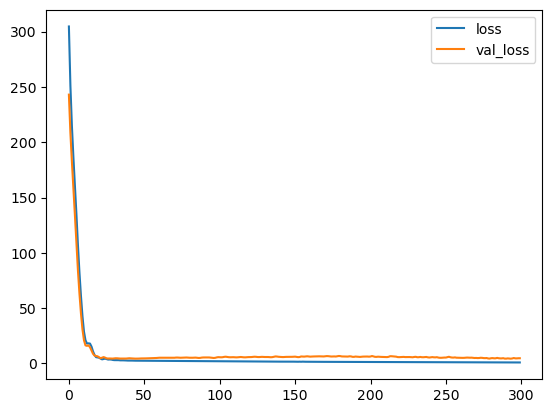

In [22]:
loss_df.plot()

In [23]:
tahmin=model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
r2_score(y_test,tahmin)

0.8508683143293686

In [27]:
mean_squared_error(y_test,tahmin)**.5

2.1695925750611575